<a href="https://colab.research.google.com/github/alexander-castro/test/blob/main/Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1Nh6vjig-ADM1RMbaHrj_GItD3O1ZW4Vr)
# Análisis con Machine Learning - MINE4206
<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/jpcano1/MINE_4206_Analisis_con_Machine_Learning/blob/main/Lab%20I/Lab_I.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </td>
</table>




### **1. Importando las librerias requeridas para el desarrollo del laboratorio**


Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:


**Nota:** Para asegurarse de tener las últimas versiones y todos los paquetes instalados que por lo general no vienen en Google Colab. pueden ejecutar la sigiuente celda.

In [ ]:
%%shell
shred -u setup_colab_general.py
wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
pip install -q tqdm==4.56.0

shred: setup_colab_general.py: failed to open for writing: No such file or directory
     \ 38.3MB 2.1MB/s
     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 1.1MB 25.3MB/s 
     |████████████████████████████████| 3.2MB 47.0MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 296kB 60.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
     |████████████████████████████████| 81kB 4.0MB/s 


In [ ]:
#Data management Libraries
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport


# Data Modeling Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer


# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Save the model
from joblib import dump, load

### **2. Perfilamiento y entendimiento de los datos**

Al intentar cargar los datos se obtuvo un error debido a la presencia de caracteres especiales, por ello fue necesario removerlos, para ello primero se transformó el texto a minúscula y luego se reemplazaron los caracteres especiales, este proceso se hizo usando la herramienta VsCode.

Luego se identificó que los registros tenían el siguiente formato:

"5/04/2021 15:27,""maria consuelo  rodriguez "",-,""curso: teoria de sistemas en las organizaciones - (204016a_951)"",registros,""informe de registro visualizado"",""the user with id '87' viewed the log report for the course with id '98'."",web,181.131.96.37"


Donde el uso de las comillas no permitía una adecuada lectura de los datos. Por ello se eliminan.
5/04/2021 15:27,maria consuelo  rodriguez ,-,curso: teoria de sistemas en las organizaciones - (204016a_951),registros,informe de registro visualizado,the user with id '87' viewed the log report for the course with id '98'.,web,181.131.96.37



#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/alexander-castro/test/main/logs.csv')

data.head()

,hora,nombre completo del usuario,usuario afectado,contexto del evento,componente,nombre evento,descripcion
0,5/4/2021 15:27,maria consuelo rodriguez,-,curso: teoria de sistemas en las organizacione...,registros,informe de registro visualizado,the user with id '87' viewed the log report fo...
1,5/4/2021 15:27,marco antonio rodriguez,john sebastian rojas cordoba,tarea: unidad 1 - fase 2 - identificacion y an...,tarea,formulario de calificaciones visto,the user with id '547402' viewed the grading f...
2,5/4/2021 15:27,marco antonio rodriguez,-,tarea: unidad 1 - fase 2 - identificacion y an...,tarea,visualizacion de las calificaciones,the user with id '547402' viewed the grading t...
3,5/4/2021 15:27,marco antonio rodriguez,-,tarea: unidad 1 - fase 2 - identificacion y an...,tarea,visualizacion de las calificaciones,the user with id '547402' viewed the grading t...
4,5/4/2021 15:27,marco antonio rodriguez,-,tarea: unidad 1 - fase 2 - identificacion y an...,tarea,visualizacion de las calificaciones,the user with id '547402' viewed the grading t...


Hora
Fecha y hora del evento
Fecha en formato dd/MM/yyyy hh:mm

Nombre completo del usuario
Nombre completo del usuario que realiza la acción 
Texto

Usuario afectado
Nombre completo del usuario al que afecta la acción 
Texto

Contexto del evento
Nombre del curso
Texto compuesto (tipo de elemento:  nombre - Id)
Tipo de elemento: Carpeta, Consulta, Contenido, Curso, Foro, Página, Tarea
Nombre: texto
id: para el caso del curso se tiene el identificador

Componente
Tipo de elemento
Registros, Sistema, Tarea, Foro, Usuario, Página, Carpeta, Actividad del curso, H5P, Hoja de cálculo OpenOffice, Informe del calificador, Archivos enviados, Informe general, Informe de resultados, Historial de calificación, Hoja de cálculo Excel, Consulta, Tours para usuarios, Estadísticas, Archivo en texto plano

Nombre evento
Acción realizada
Informe de registro visualizado, Curso visto, Visualización de las Calificaciones, Se ha visualizado el estado de la entrega., Perfil de usuario visto, Lista de usuarios vista, Módulo de curso visto, Informe de notas de usuario visto, Retroalimentación vista, Tema visto, Mensaje creado, Algún contenido ha sido publicado., Outline report viewed, Todos los envíos se están descargando., Informe de registro de usuario visualizado, Informe del usuario visualizado, Directorio descargado en formato Zip, Formulario de calificaciones visto, Se ha calificado el envío., Usuario calificado

Descripción
Detalles de la acción
Ejemplo(cambia el id, el verbo y el recurso): 
The user with id '87' viewed the log report for the course with id '98'.

Origen
Tipo de origen
web, restored

Dirección IP
Dirección IP de origen del evento 
Formato IPv4, X.X.X.X
Ejemplo:
181.131.107.193



# Creando el nuevo conjunto de datos
De estos eventos se hace evidente que es necesario conservar sólo los que involucran a los estudiantes y su relación con el curso, por ello se requiere un algoritmo que cuente dichos eventos y los agrupe por alumno.

Se tienen eventos del estudiante en el aula, la idea es agruparlos por estudiante y establecer un contador de ocurriencias por evento por recurso.

In [68]:

dataset = pd.DataFrame(data=np.array(data['nombre completo del usuario']), columns = ['Name'])
dataset.drop_duplicates(keep = "first", inplace = True)

for index, row in data.iterrows():
    name = row['nombre completo del usuario']
    resource = row['contexto del evento']
    event = row['nombre evento']
    if pd.isnull(resource) or pd.isnull(event):
      continue
    log = resource + ' - ' + event
    if not log in dataset:
      dataset[log] = np.zeros(len(dataset.index))
    i = (dataset.index[dataset['Name'] == name][0])
    dataset.at[i, log] = dataset.at[i, log] + 1 
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 84766
Columns: 153 entries, Name to curso: teoria de sistemas en las organizaciones - (204016a_951) - grupo eliminado
dtypes: float64(152), object(1)
memory usage: 655.2+ KB


,Name,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe de registro visualizado,tarea: unidad 1 - fase 2 - identificacion y analisis - rubrica de evaluacion y entrega de la actividad - formulario de calificaciones visto,tarea: unidad 1 - fase 2 - identificacion y analisis - rubrica de evaluacion y entrega de la actividad - visualizacion de las calificaciones,curso: teoria de sistemas en las organizaciones - (204016a_951) - curso visto,tarea: unidad 1 - fase 2 - identificacion y analisis - rubrica de evaluacion y entrega de la actividad - se ha calificado el envio.,curso: teoria de sistemas en las organizaciones - (204016a_951) - usuario calificado,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe de actividad visto,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe de notas de usuario visto,tarea: unidad 1 - fase 2 - identificacion y analisis - rubrica de evaluacion y entrega de la actividad - se ha visualizado el estado de la entrega.,carpeta: guia de actividades y rubrica de evaluacion - unidad 1 - fase 2 - identificacion y analisis - modulo de curso visto,carpeta: guia de actividades y rubrica de evaluacion - unidad 2 - fase 3 - modelamiento - modulo de curso visto,foro: foro de discusion - unidad 2 - fase 3 - modelamiento - modulo de curso visto,foro: foro noticias del curso - tema visto,foro: foro noticias del curso - modulo de curso visto,pagina: encuentros sincronicos via webconferencia - modulo de curso visto,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe usuario del curso visto,tarea: unidad 1 - fase 2 - identificacion y analisis - rubrica de evaluacion y entrega de la actividad - retroalimentacion vista,foro: foro de discusion - unidad 2 - fase 3 - modelamiento - tema visto,pagina: unidad 1 - conceptualizacion de la tso - contenidos y referentes bibliogràficos - modulo de curso visto,tarea: unidad 2 - fase 3 - modelamiento - rubrica de evaluacion y entrega de la actividad - se ha visualizado el estado de la entrega.,tarea: fase 4 - sustentacion final - rubrica de evaluacion y entrega de la actividad - se ha visualizado el estado de la entrega.,curso: teoria de sistemas en las organizaciones - (204016a_951) - perfil de usuario visto,curso: teoria de sistemas en las organizaciones - (204016a_951) - lista de usuarios vista,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe del calificador visto,foro: foro general del curso - tema visto,foro: foro general del curso - modulo de curso visto,tarea: fase 1 - historia de la teoria de sistemas - rubrica de evaluacion y entrega de la actividad - se ha visualizado el estado de la entrega.,tarea: fase 1 - historia de la teoria de sistemas - rubrica de evaluacion y entrega de la actividad - retroalimentacion vista,pagina: agenda del curso teoria de sistemas en las organizaciones - modulo de curso visto,curso: teoria de sistemas en las organizaciones - (204016a_951) - informe de resumen de notas visto,curso: teoria de sistemas en las organizaciones - (204016a_951) - calificacion opendocument exportada,carpeta: guia de actividades y rubrica de evaluacion - unidad 2 - fase 3 - modelamiento - directorio descargado en formato zip,contenido interactivo: linea de tiempo cibernetica - modulo de curso visto,pagina: unidad 2 - aplicaciones de la tso - contenidos y referentes bibliograficos - modulo de curso visto,foro: foro de discusion - unidad 1 - fase 2 - identificacion y analisis - tema visto,foro: foro de discusion - unidad 1 - fase 2 - identificacion y analisis - modulo de curso visto,carpeta: guia de actividades y rubrica de evaluacion - unidad 1 - fase 2 - identificacion y analisis - directorio descargado en formato zip,carpeta: guia de actividades y rubrica de evaluacion - fase 1 - historia de la teoria de sistemas - directorio descargado en formato zip,carpeta: guia de actividades y rubrica de evaluacion - fase 1 - historia de la teoria de sistemas - modulo de c

Ahora bien del archivo de calificaciones:

Nombre
Nombre del estudiante
Texto

Apellido(s)
Apellidos del estudiante
Texto

Número de ID
Cédula o tarjeta de identidad
Número

Institución
Nombre de la institución
Texto(vacío)

Departamento
Nombre del departamento
Texto(vacío)

Dirección de correo
Correo electrónico del estudiante
Texto formato email

Grupo
Grupo de la asignatura
Texto formato Código Materia Grupo
Ejemplo: 204016_33

Tarea:Fase 1 - Historia de la Teoría de sistemas - Rúbrica de evaluación y entrega de la actividad (Real)
Calificación del Trabajo #1
Número (0 a 25)

Tarea:Unidad 1 - Fase 2 - Identificación y análisis - Rúbrica de evaluación y entrega de la actividad (Real)
Calificación del Trabajo #1
Número (0 a 175)

Tarea:Unidad 2 - Fase 3 - Modelamiento - Rúbrica de evaluación y entrega de la actividad (Real)
Calificación del Trabajo #1
Número (0 a 175)

Total Categoría 75% (Real)
Calificación de agrupamiento de notas #1
Número (0 a 300)

Tarea:Fase 4 - Sustentación Final - Rúbrica de evaluación y entrega de la actividad (Real)
Calificación del Trabajo #1
Número (0 a 100)

Total Categoría 25% (Real)
Calificación de agrupamiento de notas #2
Número (0 a 125)

Total del curso (Real)
Calificación final del curso
Número (0 a 500)

Última descarga de este curso
Fecha de la última descarga del archivo
Número
Ejemplo: 1613854430



Se toman los campos de nombre y apellidos y se calcula la calificación final para un estudiante teniendo en cuenta las notas actuales.
Se toma como base el siguiente archivo.


In [78]:
califications = pd.read_csv('https://raw.githubusercontent.com/alexander-castro/test/main/calificaciones.csv')



calificationsDF = pd.DataFrame(data=np.array(califications['Nombre'] + " " + califications['Apellido(s)']), columns = ['Name'])
calificationsDF['Name'] = calificationsDF['Name'].str.lower()
calificationsDF.head()

#for index, row in data.iterrows():
#    name = row['nombre completo del usuario']


,Name
0,nissy yiretabril
1,angie tatianaacevedo
2,jaribacosta
3,javier giovannyacosta
4,fabio andresaguirre


In [ ]:
ProfileReport(data)

TypeError: ignored

### **3. Preparación de datos**

Como medida importante, sabemos que hay faltantes en estos datos, lo más recomendable es preguntar al negocio como tratar estos datos. Paar este caso se rellenarán con el valor de cero. Además, se revisará las correlaciones de los datos.

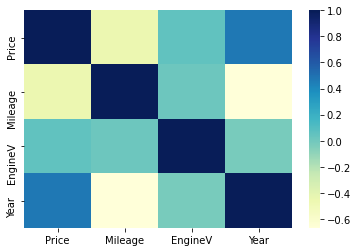

In [ ]:
data = data.fillna(data.mean())

sns.heatmap(data.corr(),cmap='YlGnBu');

Es importante saber como se comportan los datos, y así mismo saber que algortimo se utilizará para poder reprocesar los datos. Por ejemplo, si vamos a utilizar Regresión Lineal, necesitamos que todos los datos sean numéricos.

In [ ]:
data = pd.get_dummies(data)
print(data.shape)
data.head()

(4345, 23)


,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,13300.0,358,5.0,2003,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,2007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


Para todos los algoritmos de clasificación y regresión, necesitamos identificar nuestras variables explicativas y nuestra variable objetivo. Para eso separamos nuestro dataset.

Además, para evaluar el rendimiento de nuestro sistema, necesitaremos separar nuestros datos de entrenamiento, con los datos de test.

In [ ]:
X = data.drop(['Price'], axis=1)
Y = data['Price']
display(X.head())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 20, test_size=0.2)
print(X_train.shape)
display(X_train.head())
display(Y_train.head())

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,427,2.9,1999,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,358,5.0,2003,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,240,4.2,2007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,120,2.0,2011,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


(3476, 22)


,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
2350,116,1.5,2008,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
21,132,1.4,2006,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2759,255,2.5,2002,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2990,0,3.0,2016,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1772,52,1.6,2013,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


2350     6300.000000
21       7500.000000
2759     9700.000000
2990    19418.746935
1772    12400.000000
Name: Price, dtype: float64



### **4. Modelamiento**

#### **Regresión Lineal**

Para utilizar la Regresión Lineal, se utilizará la librería [sklearn](https://scikit-learn.org/stable/index.html). Ahí podrán encontrar la documentación de los diferentes algoritmos que forece la librería.


In [ ]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **5. Predicción**

Realizamos la muestra de los valores ajustados.

In [ ]:
y_pred = regr.predict(X_train)
y_pred

array([10472.63412064, 11764.87129306,  2286.04966334, ...,
       -1609.66875372, 39478.29581974,   645.24614241])

Y luego, evualuamos el rendimiento con respecto a nuestros datos de entrenamiento.

In [ ]:
print('Mean Squared Error:', mean_squared_error(Y_train, y_pred)) 
print('Mean Absolute Error:', median_absolute_error(Y_train, y_pred))
print('R2 score:', r2_score(Y_train, y_pred))

Mean Squared Error: 382511348.04829335
Mean Absolute Error: 6305.178630740149
R2 score: 0.4048613935445201


### **6. Validación**

Para comparar el modelo en producción, se realiza la evaluación en el conjunto de test ya que son datos que el modelo aún no conoce.

In [ ]:
Y_new  = regr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(Y_test, Y_new)) 
print('Mean Absolute Error:', median_absolute_error(Y_test, Y_new))
print('R2 score:', r2_score(Y_test, Y_new))

Mean Squared Error: 319457069.2366497
Mean Absolute Error: 6305.109046997502
R2 score: 0.4410611615253619


Ahora, lo vamos a intentar con una regresión regularizada, para ver si mejora el rendimiento.



### **4. Modelamiento**

#### **Regresión Linear Regularizada**

La regularización ayuda a resolver el problema de sobreajuste, lo que implica que el modelo funciona bien en los datos de entrenamiento pero tiene un mal desempeño en los datos de validación (prueba). 

La regularización resuelve este problema al agregar un término de penalización a la función objetivo y controlar la complejidad del modelo utilizando ese término de penalización.

La regularización es generalmente útil en las siguientes situaciones:

*   Gran cantidad de variables
*   Baja relación de observaciones numéricas a número de variables
*   Alta multicolinealidad


#### **Regresión Ridge**

* La regresión Ridge (cresta) o la *regresión por contracción* hace uso de la regularización de L2. 

* En la regularización de L2 intentamos minimizar la función objetivo agregando un término de penalización(alpha) a la suma de los cuadrados de los coeficientes. 

* Generalmente, a mayor valor de alpha más regularización por lo tanto el modelo se simplifica más.

In [ ]:
RidgeModel = Ridge(alpha = 5)
RidgeModel.fit(X_train, Y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

### **5. Predicción**

Realizamos la muestra de los valores ajustados.

In [ ]:
y_pred = RidgeModel.predict(X_train)
y_pred

array([10708.29271532, 11836.81738564,  2303.90971297, ...,
       -1690.77358114, 39435.35374429,   873.23192844])

Y luego, evualuamos el rendimiento con respecto a nuestros datos de entrenamiento.

In [ ]:
print('Mean Squared Error:', mean_squared_error(Y_train, y_pred)) 
print('Mean Absolute Error:', median_absolute_error(Y_train, y_pred))
print('R2 score:', r2_score(Y_train, y_pred))

Mean Squared Error: 382521366.3270827
Mean Absolute Error: 6306.56732690474
R2 score: 0.40484580638741174


### **6. Validación**

Para comparar el modelo en producción, se realiza la evaluación en el conjunto de test ya que son datos que el modelo aún no conoce.

In [ ]:
Y_new  = RidgeModel.predict(X_test)

print('Mean Squared Error:', mean_squared_error(Y_test, Y_new)) 
print('Mean Absolute Error:', median_absolute_error(Y_test, Y_new))
print('R2 score:', r2_score(Y_test, Y_new))

Mean Squared Error: 319418656.18077993
Mean Absolute Error: 6262.532574357465
R2 score: 0.44112837102202873


¿Y que pasa si aumentamos el valor de alpha?

In [ ]:
RidgeModel = Ridge(alpha = 10)
RidgeModel.fit(X_train, Y_train)
y_pred = RidgeModel.predict(X_train)
print('-----Train Report-----')
print('Mean Squared Error:',mean_squared_error(Y_train, y_pred)) 
print('Mean Absolute Error:',median_absolute_error(Y_train, y_pred))
print('R2 score:', r2_score(Y_train, y_pred))

Y_new  = RidgeModel.predict(X_test)
print('-----Test Report-----')
print('Mean Squared Error:',mean_squared_error(Y_test, Y_new)) 
print('Mean Absolute Error:',median_absolute_error(Y_test,Y_new))
print('R2 score:', r2_score(Y_test,Y_new))

-----Train Report-----
Mean Squared Error: 382550326.9360949
Mean Absolute Error: 6321.3498215179425
R2 score: 0.4048007473935348
-----Test Report-----
Mean Squared Error: 319403272.25079584
Mean Absolute Error: 6228.937700839713
R2 score: 0.44115528755255673


In [ ]:
RidgeModel = Ridge(alpha = 100)
RidgeModel.fit(X_train, Y_train)
y_pred = RidgeModel.predict(X_train)
print('-----Train Report-----')
print('Mean Squared Error:',mean_squared_error(Y_train,y_pred)) 
print('Mean Absolute Error:',median_absolute_error(Y_train,y_pred))
print('R2 score:', r2_score(Y_train,y_pred))

Y_new  = RidgeModel.predict(X_test)
print('-----Test Report-----')
print('Mean Squared Error:',mean_squared_error(Y_test,Y_new)) 
print('Mean Absolute Error:',median_absolute_error(Y_test,Y_new))
print('R2 score:', r2_score(Y_test,Y_new))

-----Train Report-----
Mean Squared Error: 385071380.8098559
Mean Absolute Error: 6438.121857853606
R2 score: 0.40087831085175685
-----Test Report-----
Mean Squared Error: 321557594.4447766
Mean Absolute Error: 6217.788496518042
R2 score: 0.4373859724840844


Ahora, como nuestra Regresión Ridge dió mejores resultados, vamos a salvar el modelo.

In [ ]:
print(list(zip(X.columns,RidgeModel.coef_)))
dump(RidgeModel, 'my_model.joblib') 

[('Mileage', -49.54662758314919), ('EngineV', 190.19178029807958), ('Year', 1097.328984954081), ('Brand_Audi', 3290.6407542500992), ('Brand_BMW', 5276.480145556894), ('Brand_Mercedes-Benz', 10631.064292798777), ('Brand_Mitsubishi', -7053.218570948921), ('Brand_Renault', -7464.101300560777), ('Brand_Toyota', -2192.7954007317094), ('Brand_Volkswagen', -2488.069920364704), ('Body_crossover', 9621.030500976389), ('Body_hatch', -3619.9401709714502), ('Body_other', 702.1227362595839), ('Body_sedan', -1204.1483844354293), ('Body_vagon', -1926.4547935893156), ('Body_van', -3572.609888239922), ('Engine Type_Diesel', 1113.5535605527127), ('Engine Type_Gas', -1582.8909876791402), ('Engine Type_Other', -820.2960015528989), ('Engine Type_Petrol', 1289.633428679349), ('Registration_no', -2929.981046744431), ('Registration_yes', 2929.9810467444486)]


['my_model.joblib']

Luego, cargamos el modelo y mostramos los coeficientes para comprobar que cargó correctamente.

In [ ]:
model = load('my_model.joblib') 
print(list(zip(X.columns,model.coef_)))

[('Mileage', -49.54662758314919), ('EngineV', 190.19178029807958), ('Year', 1097.328984954081), ('Brand_Audi', 3290.6407542500992), ('Brand_BMW', 5276.480145556894), ('Brand_Mercedes-Benz', 10631.064292798777), ('Brand_Mitsubishi', -7053.218570948921), ('Brand_Renault', -7464.101300560777), ('Brand_Toyota', -2192.7954007317094), ('Brand_Volkswagen', -2488.069920364704), ('Body_crossover', 9621.030500976389), ('Body_hatch', -3619.9401709714502), ('Body_other', 702.1227362595839), ('Body_sedan', -1204.1483844354293), ('Body_vagon', -1926.4547935893156), ('Body_van', -3572.609888239922), ('Engine Type_Diesel', 1113.5535605527127), ('Engine Type_Gas', -1582.8909876791402), ('Engine Type_Other', -820.2960015528989), ('Engine Type_Petrol', 1289.633428679349), ('Registration_no', -2929.981046744431), ('Registration_yes', 2929.9810467444486)]


## Taller
## Segundo Problema


Debido al rendimiento de los modelos, la gerencia le ha pedido que examine un tercero, la Regresión Lasso. Para ello, tiene que determinar cuál sería el mejor modelo para el concesionario. Debido a esto, se implementan los siguientes pasos:

1. Como medida de preparación de datos para mejorar el rendimiento, puede intentar normalizar los datos (Para los modelos de Regresión Lineal y regresión Ridge).
2. Utilizar un conjunto de validación para encontrar el mejor valor de alpha para la [Regresión Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).
3. Seleccionar el mejor modelo para la producción del concesionario.